In [1]:
# Import the libraries we will need
import pandas as pd # The primary library for working with data tables
import seaborn as sns # A powerful library for creating statistical visualizations
import matplotlib.pyplot as plt # The foundational library for plotting

In [2]:
# Read the original CSV file into a pandas DataFrame called 'df'
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first 5 rows of the table to confirm the data has been loaded correctly
print("Dataset loaded successfully. Here are the first 5 rows:")
df.head()

Dataset loaded successfully. Here are the first 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Use the describe() method to get a statistical summary of the data
print("Statistical summary of the dataset BEFORE cleaning:")
print(df.describe())

Statistical summary of the dataset BEFORE cleaning:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.00000


--- Visualizing the 'age' column BEFORE cleaning (Zoomed In) ---
This plot clearly shows the data points with an age less than 1.


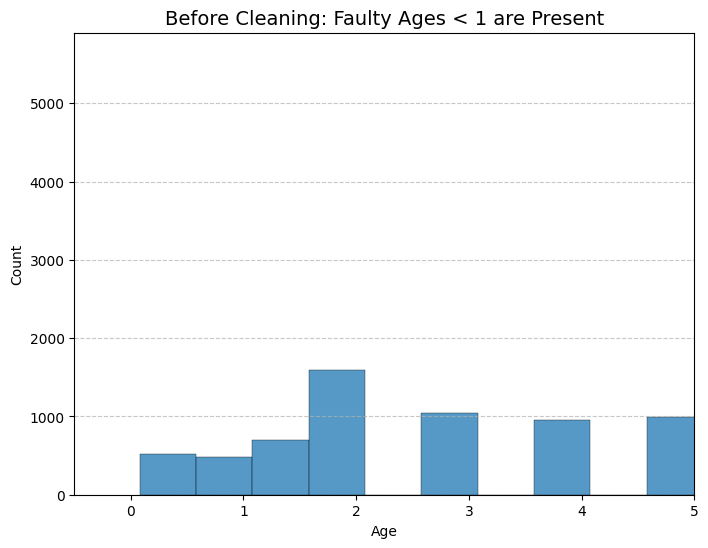

In [4]:
# --- VISUALIZATION 1: SHOWING THE PROBLEM (BEFORE CLEANING) ---

print("\n--- Visualizing the 'age' column BEFORE cleaning (Zoomed In) ---")
print("This plot clearly shows the data points with an age less than 1.")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', binwidth=0.5) # binwidth gives us more detail at this scale
plt.title('Before Cleaning: Faulty Ages < 1 are Present', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(-0.5, 5) # We zoom in on the problem area between ages 0 and 5
plt.xticks([0, 1, 2, 3, 4, 5]) # This makes the x-axis ticks clear
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Justification: An age less than 1 is medically implausible for this study.
# I will replace these error values with the median of the valid data.

# 1. Calculate the median of the 'age' column, excluding the implausible values (age < 1)
age_median = df[df['age'] > 1]['age'].median()
print(f"The median age of valid patients is: {age_median}")

# 2. Replace the implausible age values with this calculated median
df.loc[df['age'] < 1, 'age'] = age_median
print(f"Successfully replaced implausible age values.")

# 3. Verify the fix by checking the statistics AGAIN.
print("\nStatistical summary AFTER fixing implausible values:")
print(df.describe())

The median age of valid patients is: 43.0
Successfully replaced implausible age values.

Statistical summary AFTER fixing implausible values:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       42.272779       0.07485       0.039420      27.320767   
std        22.164981       0.26315       0.194593       6.636783   
min         1.000000       0.00000       0.000000      10.010000   
25%        25.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min      

In [7]:
# --- Correcting Age Data Type ---

# 1. Show the data type of 'age' column is a 'float' BEFORE fixing
print("\nData type of 'age' column BEFORE fixing:", df['age'].dtype)

# 2. Change the data type of the 'age' column from float to integer
df['age'] = df['age'].astype(int)

# 3. Show the data type is now an 'int' AFTER fixing
print("Data type of 'age' column AFTER fixing:", df['age'].dtype)

# Finally, look at the first 5 rows to see the clean, integer ages
print("\nFirst 5 rows with corrected integer ages:")
df.head()


Data type of 'age' column BEFORE fixing: float64
Data type of 'age' column AFTER fixing: int64

First 5 rows with corrected integer ages:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0



--- Visualizing the 'age' column AFTER cleaning (Zoomed In) ---
This plot confirms the faulty ages have been removed.


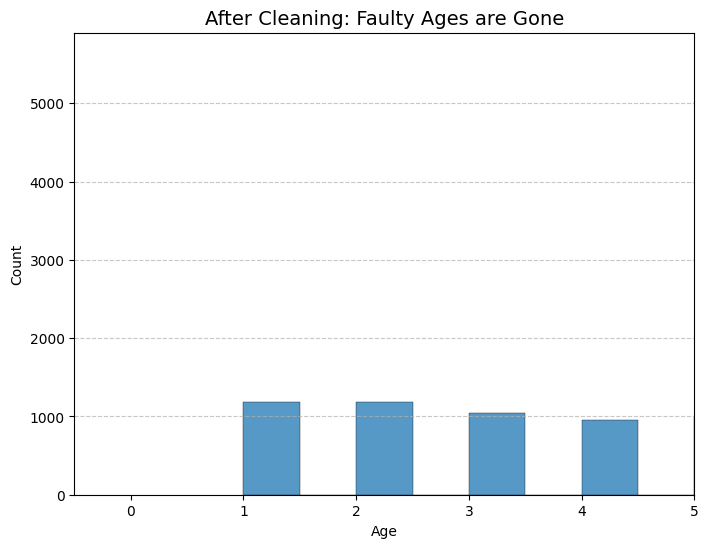

In [8]:
# --- VISUALIZATION 2: SHOWING THE FIX (AFTER CLEANING) ---

print("\n--- Visualizing the 'age' column AFTER cleaning (Zoomed In) ---")
print("This plot confirms the faulty ages have been removed.")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', binwidth=0.5)
plt.title('After Cleaning: Faulty Ages are Gone', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(-0.5, 5) # We zoom into the EXACT SAME area to provide a clear comparison
plt.xticks([0, 1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Save the fully cleaned DataFrame to a new CSV file
df.to_csv('step1_cleaned_data_Dahanayake.csv', index=False)

print("\nFinal cleaned dataset has been successfully saved as 'step1_cleaned_data_Dahanayake.csv'")


Final cleaned dataset has been successfully saved as 'step1_cleaned_data_Dahanayake.csv'
